In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/eBird/ebd_US-CA_201901_201912_relApr-2023/ebd_US-CA_201901_201912_relApr-2023.txt', sep='\t')

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_46966/2494448556.py:1: DtypeWarning: Columns (9,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/eBird/ebd_US-CA_201901_201912_relApr-2023/ebd_US-CA_201901_201912_relApr-2023.txt', sep='\t')


In [3]:
df.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'TAXON CONCEPT ID', 'COMMON NAME', 'SCIENTIFIC NAME',
       'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'EXOTIC CODE',
       'OBSERVATION COUNT', 'BREEDING CODE', 'BREEDING CATEGORY',
       'BEHAVIOR CODE', 'AGE/SEX', 'COUNTRY', 'COUNTRY CODE', 'STATE',
       'STATE CODE', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE',
       'USFWS CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE',
       'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER',
       'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES',
       'EFFORT DISTANCE KM', 'EFFORT AREA HA', 'NUMBER OBSERVERS',
       'ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED',
       'REVIEWED', 'REASON', 'TRIP COMMENTS', 'SPECIES COMMENTS',
       'Unnamed: 49'],
      dtype='object')

In [4]:
df.iloc[0, :]

GLOBAL UNIQUE IDENTIFIER      URN:CornellLabOfOrnithology:EBIRD:OBS698024716
LAST EDITED DATE                                  2021-08-05 02:45:57.629774
TAXONOMIC ORDER                                                         8078
CATEGORY                                                                spuh
TAXON CONCEPT ID                                            avibase-CA08045E
COMMON NAME                                                    Accipiter sp.
SCIENTIFIC NAME                                                Accipiter sp.
SUBSPECIES COMMON NAME                                                   NaN
SUBSPECIES SCIENTIFIC NAME                                               NaN
EXOTIC CODE                                                              NaN
OBSERVATION COUNT                                                          1
BREEDING CODE                                                            NaN
BREEDING CATEGORY                                                        NaN

In [5]:
df.iloc[0:10, :].T

,0,1,2,3,4,5,6,7,8,9
GLOBAL UNIQUE IDENTIFIER,URN:CornellLabOfOrnithology:EBIRD:OBS698024716,URN:CornellLabOfOrnithology:EBIRD:OBS692730992,URN:CornellLabOfOrnithology:EBIRD:OBS702777051,URN:CornellLabOfOrnithology:EBIRD:OBS697015061,URN:CornellLabOfOrnithology:EBIRD:OBS703645792,URN:CornellLabOfOrnithology:EBIRD:OBS699791078,URN:CornellLabOfOrnithology:EBIRD:OBS701988795,URN:CornellLabOfOrnithology:EBIRD:OBS697576904,URN:CornellLabOfOrnithology:EBIRD:OBS698385823,URN:CornellLabOfOrnithology:EBIRD:OBS693830964
LAST EDITED DATE,2021-08-05 02:45:57.629774,2019-01-02 13:51:35,2019-01-27 21:53:18,2021-03-18 00:43:01.179135,2020-01-27 18:00:05,2021-04-01 02:10:03.093984,2019-01-23 17:09:56,2019-01-30 00:41:59,2019-11-23 20:26:58,2021-03-25 11:05:49.608382
TAXONOMIC ORDER,8078,8078,8078,8078,8078,8078,10835,10835,10835,10835
CATEGORY,spuh,spuh,spuh,spuh,spuh,spuh,species,species,species,species
TAXON CONCEPT ID,avibase-CA08045E,avibase-CA08045E,avibase-CA08045E,avibase-CA08045E,avibase-CA08045E,avibase-CA08045E,avibase-7E327303,avibase-7E327303,avibase-7E327303,avibase-7E327303
COMMON NAME,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Acorn Woodpecker,Acorn Woodpecker,Acorn Woodpecker,Acorn Woodpecker
SCIENTIFIC NAME,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Accipiter sp.,Melanerpes formicivorus,Melanerpes formicivorus,Melanerpes formicivorus,Melanerpes formicivorus
SUBSPECIES COMMON NAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBSPECIES SCIENTIFIC NAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXOTIC CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['COUNTRY'].value_counts()

United States    8694926
Name: COUNTRY, dtype: int64

In [7]:
df['STATE'].value_counts()

California    8694926
Name: STATE, dtype: int64

In [8]:
df['STATE CODE'].value_counts()

US-CA    8694926
Name: STATE CODE, dtype: int64

In [9]:
selected_columns = [
    'TAXON CONCEPT ID',
    'COMMON NAME', 'SCIENTIFIC NAME',
    'OBSERVATION COUNT',
    'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE'
]

In [10]:
df_filtered = df[
    (df['LATITUDE']>=36.4701132878)
    &
    (df['LATITUDE']<=42.009518)
    &
    (df['LONGITUDE']>= -124.409591)
    &
    (df['LONGITUDE']<= -114.131211)
][selected_columns].copy()

In [11]:
df_filtered.shape

(5168169, 7)

## Reduction from 8.69 million to 5.16 million for the bounding box

In [12]:
df_filtered['OBSERVATION COUNT'].value_counts()

1       1700308
2        978793
3        457009
4        344981
5        239338
         ...   
852           1
4750          1
1061          1
2255          1
988           1
Name: OBSERVATION COUNT, Length: 1431, dtype: int64

In [13]:
df_filtered[~df_filtered['OBSERVATION COUNT'].str.isnumeric()]['OBSERVATION COUNT'].value_counts()

X    107218
Name: OBSERVATION COUNT, dtype: int64

In [14]:
df_filtered[df_filtered['OBSERVATION COUNT'].str.isnumeric()]['OBSERVATION COUNT'].values[0]

'1'

In [15]:
df_filtered['OBSERVATION COUNT'] = df_filtered['OBSERVATION COUNT'].apply(lambda x: 1 if x == 'X' else int(x))

In [16]:
df_filtered['OBSERVATION COUNT'].value_counts()

1       1807526
2        978793
3        457009
4        344981
5        239338
         ...   
852           1
4750          1
1061          1
2255          1
473           1
Name: OBSERVATION COUNT, Length: 1430, dtype: int64

In [17]:
df_filtered.shape

(5168169, 7)

In [18]:
df_filtered

,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE
0,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.892331,-122.311800,2019-01-13
1,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.871270,-122.307890,2019-01-01
2,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25
3,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.695328,-121.844741,2019-01-10
4,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25
...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,13,39.427357,-121.130547,2019-12-26
8694922,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.189706,-121.593404,2019-12-19
8694923,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19
8694924,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19


In [19]:
df_filtered['observation_datetime'] = pd.to_datetime(df_filtered['OBSERVATION DATE'])

In [21]:
df_filtered

,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE,observation_datetime
0,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.892331,-122.311800,2019-01-13,2019-01-13
1,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.871270,-122.307890,2019-01-01,2019-01-01
2,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25,2019-01-25
3,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.695328,-121.844741,2019-01-10,2019-01-10
4,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25,2019-01-25
...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,13,39.427357,-121.130547,2019-12-26,2019-12-26
8694922,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.189706,-121.593404,2019-12-19,2019-12-19
8694923,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19,2019-12-19
8694924,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19,2019-12-19


In [22]:
df_filtered['WEEK'] = df_filtered['observation_datetime'].dt.week

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_46966/462059484.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_filtered['WEEK'] = df_filtered['observation_datetime'].dt.week


In [23]:
df_filtered

,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE,observation_datetime,WEEK
0,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.892331,-122.311800,2019-01-13,2019-01-13,2
1,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.871270,-122.307890,2019-01-01,2019-01-01,1
2,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25,2019-01-25,4
3,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.695328,-121.844741,2019-01-10,2019-01-10,2
4,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25,2019-01-25,4
...,...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,13,39.427357,-121.130547,2019-12-26,2019-12-26,52
8694922,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.189706,-121.593404,2019-12-19,2019-12-19,51
8694923,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19,2019-12-19,51
8694924,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19,2019-12-19,51


In [24]:
df_filtered['AVIBASEID'] = df_filtered['TAXON CONCEPT ID'].apply(lambda x: x[8:])

In [25]:
df_filtered

,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE,observation_datetime,WEEK,AVIBASEID
0,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.892331,-122.311800,2019-01-13,2019-01-13,2,CA08045E
1,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.871270,-122.307890,2019-01-01,2019-01-01,1,CA08045E
2,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25,2019-01-25,4,CA08045E
3,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.695328,-121.844741,2019-01-10,2019-01-10,2,CA08045E
4,avibase-CA08045E,Accipiter sp.,Accipiter sp.,1,37.834029,-122.238747,2019-01-25,2019-01-25,4,CA08045E
...,...,...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,13,39.427357,-121.130547,2019-12-26,2019-12-26,52,BC5A9498
8694922,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.189706,-121.593404,2019-12-19,2019-12-19,51,BC5A9498
8694923,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19,2019-12-19,51,BC5A9498
8694924,avibase-BC5A9498,Yellow-rumped Warbler,Setophaga coronata,4,39.264460,-121.602397,2019-12-19,2019-12-19,51,BC5A9498


In [26]:
df_filtered['AVIBASEID'].nunique()

918

In [27]:
df_inat = pd.read_csv('./df_full_final_saved.csv')

In [28]:
avibase_ids_finalized = set(df_inat['aviID_short'].values)

In [29]:
df_filtered.shape

(5168169, 10)

In [30]:
df_filtered = df_filtered[df_filtered['AVIBASEID'].isin(avibase_ids_finalized)].copy()

In [31]:
df_filtered.shape

(3219048, 10)

## Further reduction in records from 5.16 million to 3.21 million

In [32]:
df_filtered['AVIBASEID'].nunique()

135

## Found data for 135 of 139 birds from iNaturalist

In [33]:
df_filtered['OBSERVATION COUNT'].sum()

160038754

In [34]:
df_filtered.groupby('WEEK').sum()['OBSERVATION COUNT']

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_46966/1577620526.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_filtered.groupby('WEEK').sum()['OBSERVATION COUNT']


WEEK
1     3367662
2     2101250
3     1201956
4     2205603
5     1120140
6     1663203
7     1525678
8     1786696
9      875785
10    1182332
11    3823641
12    2034623
13    1748221
14    1199302
15    2456031
16    4067482
17    4629719
18    5197312
19    5184694
20    4382751
21    3320000
22    4667319
23    9443939
24    9358442
25    8002939
26    7528473
27    6720167
28    8250275
29    4779653
30    2859584
31    3212444
32    2085857
33    1579978
34    1675114
35    1284469
36    1356169
37    1081975
38    1063411
39    1155011
40    1056052
41    1200323
42    1323788
43    1012001
44    1352688
45    1775338
46    2458408
47    4089655
48    2026753
49    1250190
50    3200534
51    2035160
52    6078564
Name: OBSERVATION COUNT, dtype: int64

In [36]:
df_ebird_135 = df_filtered.pivot_table(index=['AVIBASEID', 'WEEK'],values='OBSERVATION COUNT', aggfunc='sum').reset_index()

In [37]:
df_ebird_135

,AVIBASEID,WEEK,OBSERVATION COUNT
0,00124D98,1,12303
1,00124D98,2,7115
2,00124D98,3,5005
3,00124D98,4,7304
4,00124D98,5,5208
...,...,...,...
6708,FFF61080,48,166
6709,FFF61080,49,193
6710,FFF61080,50,347
6711,FFF61080,51,316


In [38]:
# No Normalization
df_ebird_135['normalized_observation_count'] = df_ebird_135.apply(
    # lambda x: x['OBSERVATION COUNT']/ebird_freq_dict[x['MONTH']],
    lambda x: x['OBSERVATION COUNT']/1,
    axis=1
).copy()

In [39]:
df_ebird_135

,AVIBASEID,WEEK,OBSERVATION COUNT,normalized_observation_count
0,00124D98,1,12303,12303.0
1,00124D98,2,7115,7115.0
2,00124D98,3,5005,5005.0
3,00124D98,4,7304,7304.0
4,00124D98,5,5208,5208.0
...,...,...,...,...
6708,FFF61080,48,166,166.0
6709,FFF61080,49,193,193.0
6710,FFF61080,50,347,347.0
6711,FFF61080,51,316,316.0


In [40]:
ebird_135_norm_counts = df_ebird_135.groupby('AVIBASEID').sum()['normalized_observation_count'].to_dict()

In [41]:
df_ebird_135['fractional_norm_count'] = df_ebird_135.apply(
    lambda x: x['normalized_observation_count']/ebird_135_norm_counts[x['AVIBASEID']],
    axis=1
).copy()

In [42]:
df_ebird_135

,AVIBASEID,WEEK,OBSERVATION COUNT,normalized_observation_count,fractional_norm_count
0,00124D98,1,12303,12303.0,0.042312
1,00124D98,2,7115,7115.0,0.024470
2,00124D98,3,5005,5005.0,0.017213
3,00124D98,4,7304,7304.0,0.025120
4,00124D98,5,5208,5208.0,0.017911
...,...,...,...,...,...
6708,FFF61080,48,166,166.0,0.003755
6709,FFF61080,49,193,193.0,0.004366
6710,FFF61080,50,347,347.0,0.007849
6711,FFF61080,51,316,316.0,0.007148


In [43]:
df_ebird_135['fractional_norm_count'].sum()

135.0

In [44]:
df_ebird_135_final = df_ebird_135.pivot_table(index=['AVIBASEID'], columns=['WEEK'], values='fractional_norm_count', aggfunc='sum')

In [45]:
df_ebird_135_final

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
00124D98,0.042312,0.024470,0.017213,0.025120,0.017911,0.017994,0.018520,0.019139,0.015879,0.016181,...,0.011408,0.013684,0.014940,0.017602,0.020511,0.016154,0.019916,0.029656,0.028456,0.025777
01060BFD,0.011625,0.006644,0.004646,0.018172,0.003144,0.008384,0.009025,0.008622,0.004102,0.002035,...,0.006551,0.019449,0.009672,0.018500,0.008229,0.014554,0.008783,0.019840,0.008347,0.008279
018B3169,0.073518,0.061320,0.035931,0.066564,0.041395,0.059499,0.053041,0.048184,0.039960,0.029308,...,0.006016,0.027486,0.035158,0.030191,0.031184,0.034717,0.032840,0.056629,0.027100,0.048350
03AC32BA,0.050923,0.038313,0.026074,0.043219,0.085955,0.055264,0.027143,0.075968,0.033839,0.027020,...,0.010388,0.021476,0.025714,0.031864,0.041090,0.033088,0.041275,0.064983,0.069684,0.103800
0413ED30,0.025778,0.016171,0.013902,0.014205,0.015614,0.012180,0.012855,0.019106,0.009871,0.014958,...,0.036892,0.039944,0.033282,0.048084,0.035238,0.039504,0.026737,0.036129,0.023166,0.037547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.048065,0.028985,0.021722,0.036709,0.019081,0.021194,0.020005,0.030833,0.020071,0.024561,...,0.016176,0.013865,0.018355,0.018421,0.016836,0.010234,0.014723,0.041661,0.026079,0.021326
FD2B0309,0.017253,0.059155,0.028272,0.054970,0.002955,0.001872,0.003866,0.007787,0.005425,0.006904,...,0.005345,0.005206,0.003315,0.015328,0.007053,0.014173,0.009770,0.002282,0.051542,0.014129
FED3756C,0.045515,0.036479,0.040295,0.063253,0.019076,0.028246,0.048862,0.036412,0.015863,0.023963,...,0.009839,0.011245,0.011312,0.020616,0.033400,0.020482,0.014190,0.034605,0.029652,0.037550


In [46]:
df_ebird_135_final.fillna(0, inplace=True)

In [47]:
df_ebird_135_final

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
00124D98,0.042312,0.024470,0.017213,0.025120,0.017911,0.017994,0.018520,0.019139,0.015879,0.016181,...,0.011408,0.013684,0.014940,0.017602,0.020511,0.016154,0.019916,0.029656,0.028456,0.025777
01060BFD,0.011625,0.006644,0.004646,0.018172,0.003144,0.008384,0.009025,0.008622,0.004102,0.002035,...,0.006551,0.019449,0.009672,0.018500,0.008229,0.014554,0.008783,0.019840,0.008347,0.008279
018B3169,0.073518,0.061320,0.035931,0.066564,0.041395,0.059499,0.053041,0.048184,0.039960,0.029308,...,0.006016,0.027486,0.035158,0.030191,0.031184,0.034717,0.032840,0.056629,0.027100,0.048350
03AC32BA,0.050923,0.038313,0.026074,0.043219,0.085955,0.055264,0.027143,0.075968,0.033839,0.027020,...,0.010388,0.021476,0.025714,0.031864,0.041090,0.033088,0.041275,0.064983,0.069684,0.103800
0413ED30,0.025778,0.016171,0.013902,0.014205,0.015614,0.012180,0.012855,0.019106,0.009871,0.014958,...,0.036892,0.039944,0.033282,0.048084,0.035238,0.039504,0.026737,0.036129,0.023166,0.037547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.048065,0.028985,0.021722,0.036709,0.019081,0.021194,0.020005,0.030833,0.020071,0.024561,...,0.016176,0.013865,0.018355,0.018421,0.016836,0.010234,0.014723,0.041661,0.026079,0.021326
FD2B0309,0.017253,0.059155,0.028272,0.054970,0.002955,0.001872,0.003866,0.007787,0.005425,0.006904,...,0.005345,0.005206,0.003315,0.015328,0.007053,0.014173,0.009770,0.002282,0.051542,0.014129
FED3756C,0.045515,0.036479,0.040295,0.063253,0.019076,0.028246,0.048862,0.036412,0.015863,0.023963,...,0.009839,0.011245,0.011312,0.020616,0.033400,0.020482,0.014190,0.034605,0.029652,0.037550


In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=12)

In [50]:
pca.fit(df_ebird_135_final.values)

PCA(n_components=12)

In [51]:
pca.explained_variance_ratio_

array([0.33021486, 0.20769029, 0.12692777, 0.05133285, 0.04259424,
       0.03571744, 0.02808427, 0.02168509, 0.01807763, 0.0158249 ,
       0.01234105, 0.0115933 ])

In [52]:
np.cumsum(pca.explained_variance_ratio_)

array([0.33021486, 0.53790516, 0.66483293, 0.71616578, 0.75876003,
       0.79447747, 0.82256174, 0.84424684, 0.86232446, 0.87814937,
       0.89049042, 0.90208372])

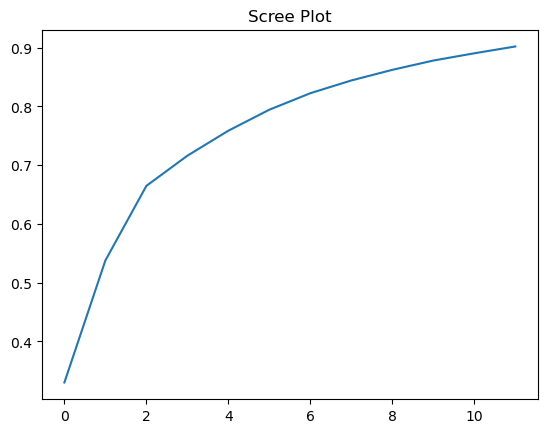

In [54]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Scree Plot")
plt.show()

<Axes: xlabel='WEEK'>

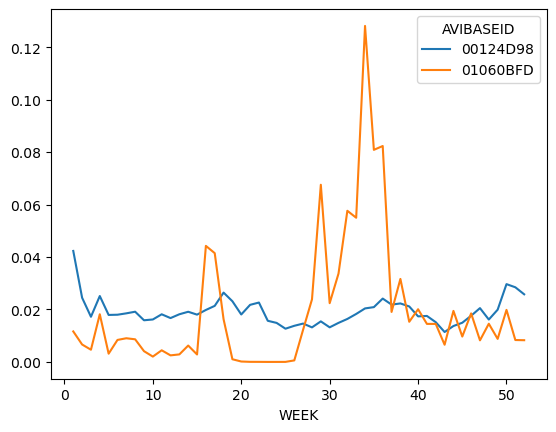

In [55]:
df_ebird_135_final.iloc[0:2, :].T.plot()

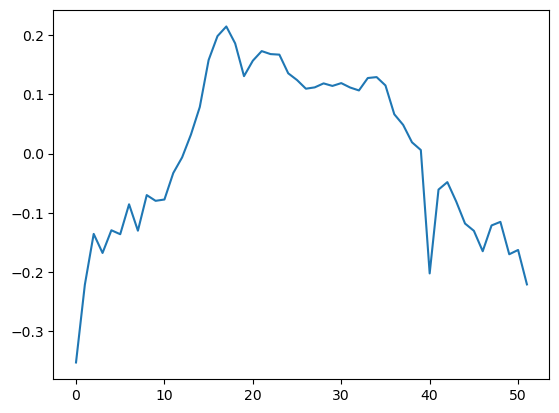

In [56]:
plt.plot(pca.components_[0])

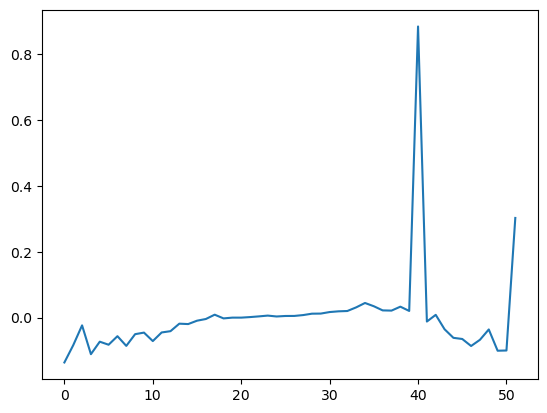

In [57]:
plt.plot(pca.components_[1])

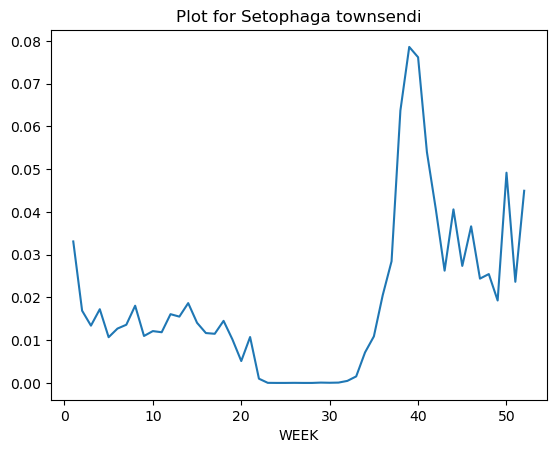

In [58]:
df_ebird_135_final.loc['F6C6C3F7', :].plot()
plt.title('Plot for Setophaga townsendi')
plt.show()

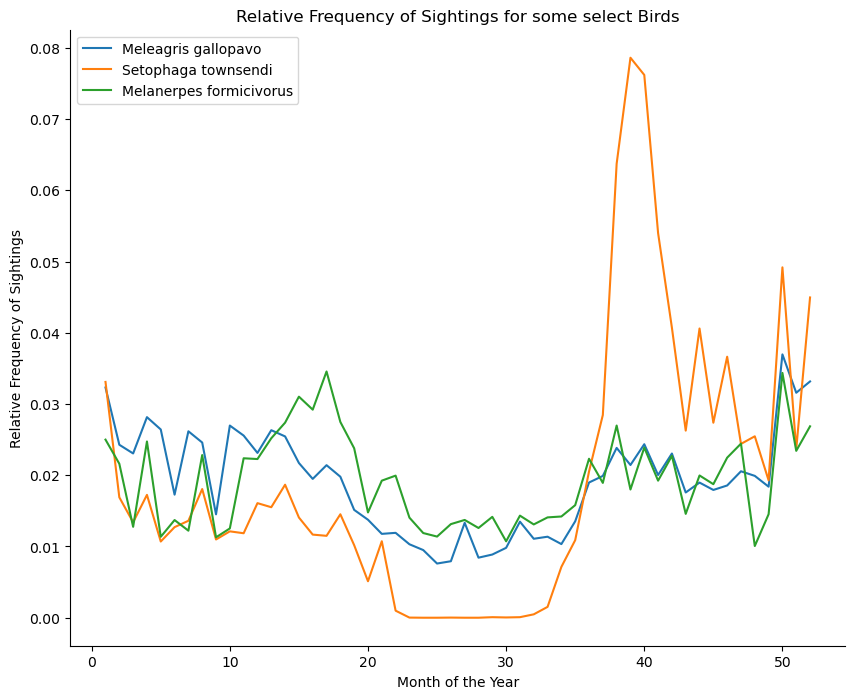

In [59]:
avibase_ids_3birds = ['9C5ED06A', 'F6C6C3F7', '7E327303']
fig, ax = plt.subplots(1,1,figsize=(10,8))
df_ebird_135_final.loc[avibase_ids_3birds, :].T.plot(ax=ax)
plt.legend(['Meleagris gallopavo',
'Setophaga townsendi',
'Melanerpes formicivorus'])
plt.title("Relative Frequency of Sightings for some select Birds")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Month of the Year")
ax.set_ylabel("Relative Frequency of Sightings")
plt.show()

# Exporting those 135 birds and their counts

In [60]:
df_ebird_135.to_csv('ebird_data_135_weekly_nn.csv')